In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
import pandas as pd

In [3]:
import pymc3 as pm

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [17]:
pm.__version__

'3.10.0'

In [5]:
import arviz as az

In [6]:
az.__version__

'0.11.0'

In [7]:
data = np.array([1,0,0,1,0,0,1,0,0,0])

In [8]:
data

array([1, 0, 0, 1, 0, 0, 1, 0, 0, 0])

In [9]:
with pm.Model() as our_first_model:
    theta = pm.Beta('theta', alpha=1, beta=1)
    y = pm.Bernoulli('y', p=theta, observed=data)
    trace = pm.sample(1000, random_seed=123)
# https://docs.pymc.io/en/v3/api/inference.html
# 기본적으로 각 chain 별로 1000개가 추출됨 (이는 사용되지는 않음)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [theta]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 31 seconds.


In [9]:
list(trace)

[{'theta_logodds__': -0.11526368179256649, 'theta': 0.4712159405683152},
 {'theta_logodds__': -1.5513029368924236, 'theta': 0.17489816325794505},
 {'theta_logodds__': -0.030408833345870523, 'theta': 0.4923983774210633},
 {'theta_logodds__': -0.4950926460337166, 'theta': 0.37869460634178737},
 {'theta_logodds__': -1.1390479877515833, 'theta': 0.24249519446691076},
 {'theta_logodds__': -0.5810260721860528, 'theta': 0.35869652865866586},
 {'theta_logodds__': -0.5810260721860528, 'theta': 0.35869652865866586},
 {'theta_logodds__': -0.5274672824443203, 'theta': 0.3711077976618053},
 {'theta_logodds__': -0.5274672824443203, 'theta': 0.3711077976618053},
 {'theta_logodds__': -0.6672311594289135, 'theta': 0.3391171074948379},
 {'theta_logodds__': -0.6672311594289135, 'theta': 0.3391171074948379},
 {'theta_logodds__': -0.6672311594289135, 'theta': 0.3391171074948379},
 {'theta_logodds__': -0.6672311594289135, 'theta': 0.3391171074948379},
 {'theta_logodds__': 0.16465489675552714, 'theta': 0.541

array([[<AxesSubplot:title={'center':'theta'}>,
        <AxesSubplot:title={'center':'theta'}>]], dtype=object)

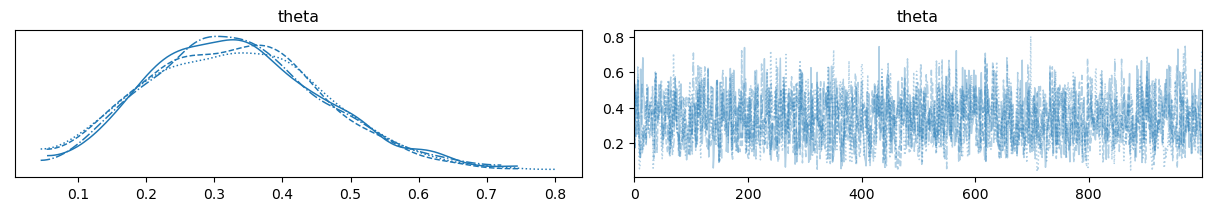

In [10]:
az.plot_trace(trace)

C:\Users\user\anaconda3\lib\site-packages\arviz\data\io_pymc3.py:88: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([[<AxesSubplot: title={'center': 'theta'}>,
        <AxesSubplot: title={'center': 'theta'}>]], dtype=object)

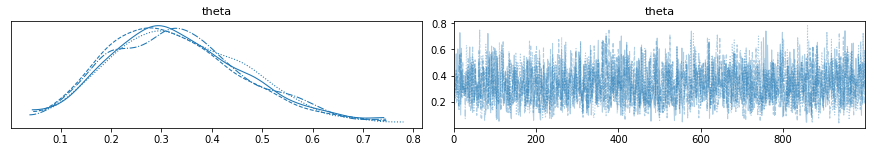

In [12]:
az.plot_trace(trace)

<AxesSubplot:title={'center':'theta'}>

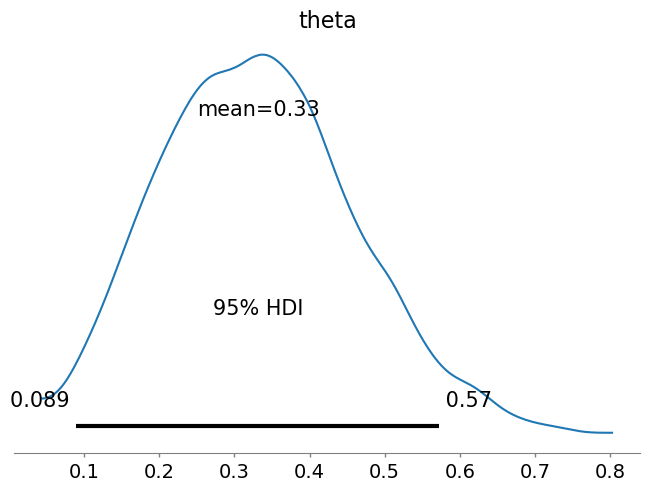

In [11]:
az.plot_posterior(trace, hdi_prob=0.95)

In [12]:
az.summary(trace, kind="stats")

,mean,sd,hdi_3%,hdi_97%
theta,0.332,0.128,0.089,0.556


In [13]:
with pm.Model() as our_first_model:
    theta = pm.Beta('theta', alpha=1, beta=1)
    y = pm.Bernoulli('y', p=theta, observed=data)
    step = pm.Metropolis() # 메트로폴리스 방법 사용
    trace_MP = pm.sample(1000, step, random_seed=123)

Multiprocess sampling (4 chains in 4 jobs)
Metropolis: [theta]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 27 seconds.


array([[<AxesSubplot:title={'center':'theta'}>,
        <AxesSubplot:title={'center':'theta'}>]], dtype=object)

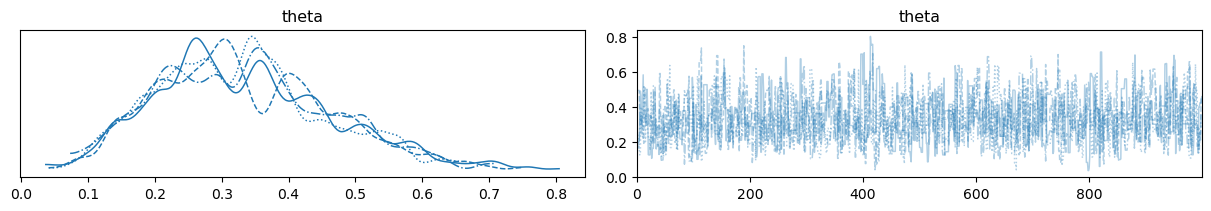

In [14]:
az.plot_trace(trace_MP)

<AxesSubplot:title={'center':'theta'}>

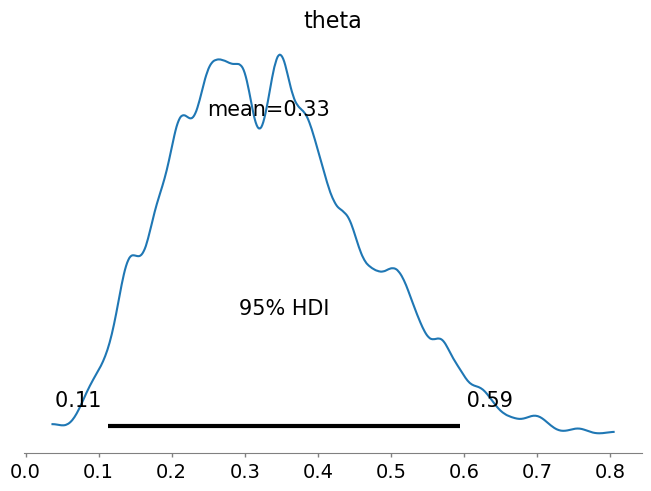

In [15]:
az.plot_posterior(trace_MP, hdi_prob=0.95)

In [16]:
with pm.Model() as our_first_model:
    theta = pm.Beta('theta', alpha=1, beta=1)
    y = pm.Bernoulli('y', p=theta, observed=data)
    step = pm.HamiltonianMC()
    trace_HMC = pm.sample(1000, step, random_seed=123)

Multiprocess sampling (4 chains in 4 jobs)
HamiltonianMC: [theta]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 30 seconds.


array([[<AxesSubplot:title={'center':'theta'}>,
        <AxesSubplot:title={'center':'theta'}>]], dtype=object)

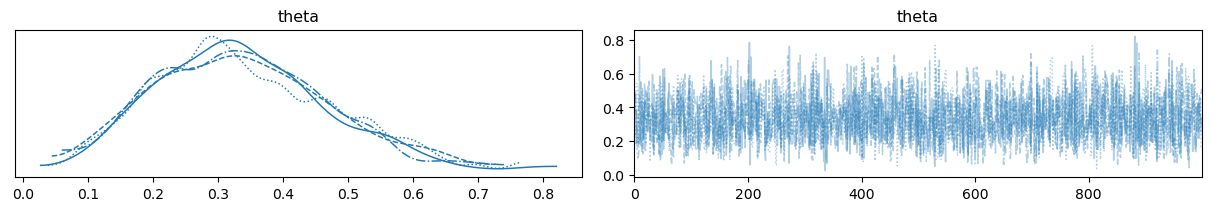

In [18]:
az.plot_trace(trace_HMC)

<AxesSubplot:title={'center':'theta'}>

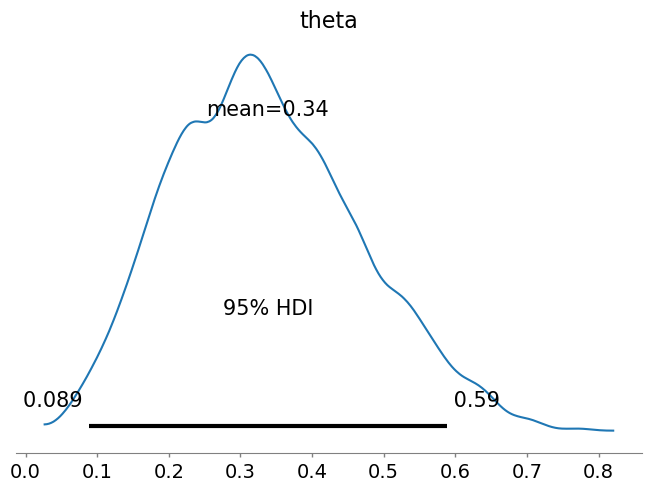

In [19]:
az.plot_posterior(trace_HMC, hdi_prob=0.95)